In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import matplotlib
import graphviz
from IPython.display import display,HTML,Image
from IPython.display import Markdown as md
from ipywidgets import widgets
from diagrams import Diagram,Cluster,Edge
from diagrams import aws
from diagrams.aws import analytics as aws_analytics
from diagrams.aws import network as aws_network
from diagrams.aws import compute as aws_compute
from diagrams.aws import database as aws_database
from diagrams.onprem import vcs
import fcgadgets.bc1ha.bc1ha_utils as u1ha
import fcgadgets.bc1ha.bc1ha_plot as p1ha
import fcgadgets.cbrunner.cbrun as cbr
import fcgadgets.cbrunner.cbrun_util as cbu
import fcgadgets.macgyver.util_fcs_graphs as ufcs
import fcgadgets.macgyver.util_fcs_qa as qa
import fcgadgets.macgyver.util_general as gu
import fcgadgets.macgyver.util_gis as gis
import fcgadgets.macgyver.util_inventory as uinv
import fcgadgets.macgyver.util_demo as udem
import fcgadgets.macgyver.util_nose as unose

In [2]:
# Export
# jupyter nbconvert "G:\My Drive\Code_Python\bcfcs\FCS_Silv.ipynb" --to=html --TemplateExporter.exclude_input=True

In [3]:
# Prepare session
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
display(HTML("<style>.container { width:80% !important; } .output {align-items:center; }</style>"))
warnings.filterwarnings('ignore')

In [8]:
# Import project information
meta=u1ha.Init()
meta=u1ha.ImportLUTs(meta)
meta['Paths']['Text']={'Text':r'C:\Users\rhember\Government of BC\FCCS Team - Forest Carbon\Projects\BC-FCS\Documentation\R2025\BC FCS 04 Silviculture.docx'}

In [9]:
# Import geospatial data
roi={'Type':'Prov','Name':'Prov'}
meta['Graphics']['Map']['RGSF']=5 # Reduce resolution of maps to preserve memory
meta['Graphics']['Print Figures']='Off'
meta['Graphics']['Print Figure Path']=r'C:\Users\rhember\OneDrive - Government of BC\Figures\BCFCS\BCFCS_NOSEC\2024-09-04'
meta['Mapping']='Off'
if meta['Mapping']=='On':
    gdf_prov=u1ha.Import_GDBs_ProvinceWide(meta)
    roi=u1ha.DefineROI(meta,roi,gdf_prov)
    #roi=u1ha.Import_Raster(meta,roi,['lc_comp1_2019'])

In [10]:
txt=ufcs.ImportText(meta,'Text')
txt=ufcs.AddParagraphs(txt,4)

In [6]:
# Import modelling projects
#pNamC,pNamF,metaNOSE,mosNOSE,iPS,iSS,iYS,iT,cNam=ufcs.NOSE_ImportMOS()
pNamNO='BCFCS_NOSEC'
metaNO=gu.ipickle(r'C:\Data\BCFCS\BCFCS_NOSEC\Inputs\Metadata.pkl')
metaNO['Graphics']['Print Figures']='Off'
mosNO=gu.ipickle(r'C:\Data\BCFCS\BCFCS_NOSEC\Outputs\MOS.pkl')
cNam='NOSE1'

In [7]:
# Add future projected implementation
metaNO[pNamNO]['AIL CAP']=45000000/1850 # https://www2.gov.bc.ca/assets/gov/farming-natural-resources-and-industry/forestry/stewardship/forest-investment-program/forest-investment-program-strategy-policy.pdf
mosNOWF=unose.ProjectFuture(metaNO,pNamNO,mosNO)

In [9]:
txt=ufcs.AddParagraphs(txt,2)

In [10]:
# *** Not displaying in HTML! ***
#img1=open('Nutrient Management Helicopter.jpg','rb').read()
#wi1=widgets.Image(value=img1, format='jpg',width=400,height=700)
#Text=widgets.HTML(
#    value=txt0,
#    placeholder='Paste ticket description here!',
#    description='',
#    disabled=False)
#wid=widgets.HBox([wi1,Text])
#display(wid)

In [11]:
txt=ufcs.AddParagraphs(txt,2)

In [12]:
txt=ufcs.AddParagraphs(txt,5)

In [13]:
txt=ufcs.AddParagraphs(txt,4)

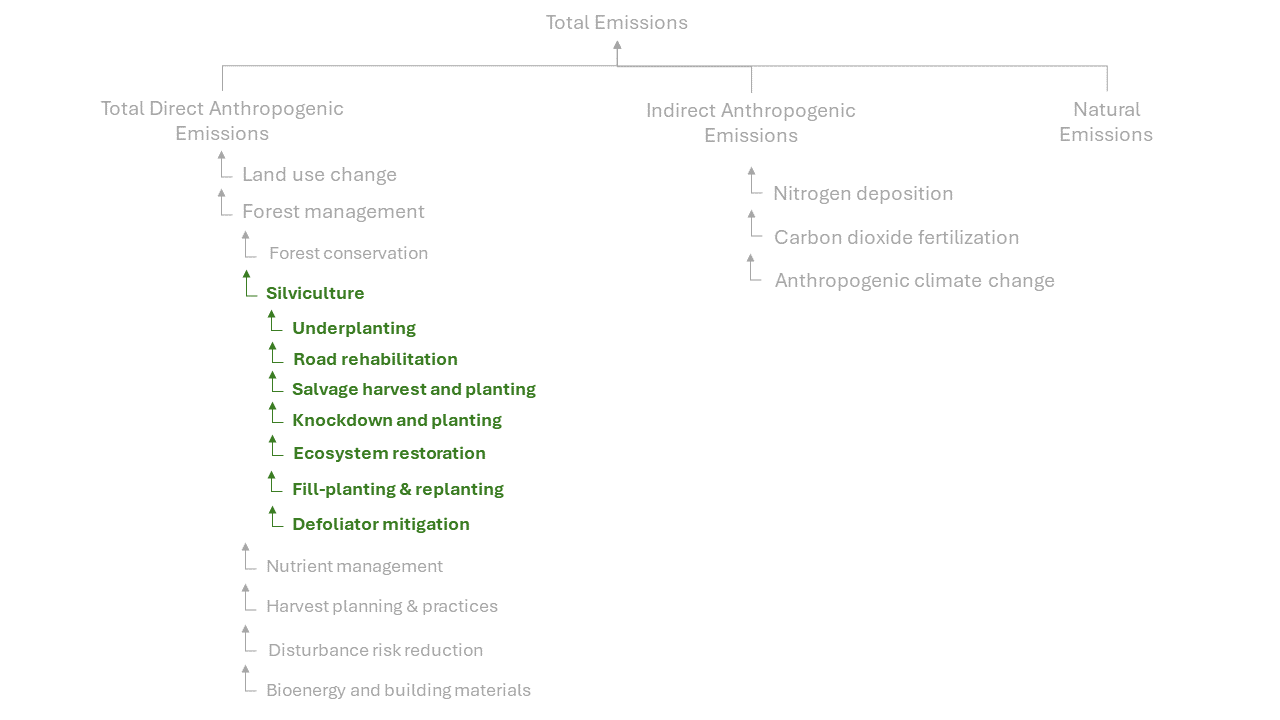

<b>Figure 1</b>. The silviculture action category as it relates to estimation of total direct anthropogenic emissions.

In [14]:
display(Image(filename='Taxonomy Silviculture.png',width=1000))
meta=ufcs.FigureCaption(meta,'The silviculture action category as it relates to estimation of total direct anthropogenic emissions.')
#capt='Taxonomy of climate forcing categories'#ufcs.Plot_Tier2Categories(meta,capt)#meta=ufcs.FigureCaption(meta,capt)

In [15]:
if meta['Mapping']=='On':
    ufcs.PlotMapOfSparseXYSample(metaNOSE,pNamC);plt.show()
    meta=ufcs.FigureCaption(meta,'Map of sampling locations where modelling was performed for estimation of GHG emission reductions from non-obligation stand establishment.')

In [16]:
txt=ufcs.AddParagraphs(txt,11)

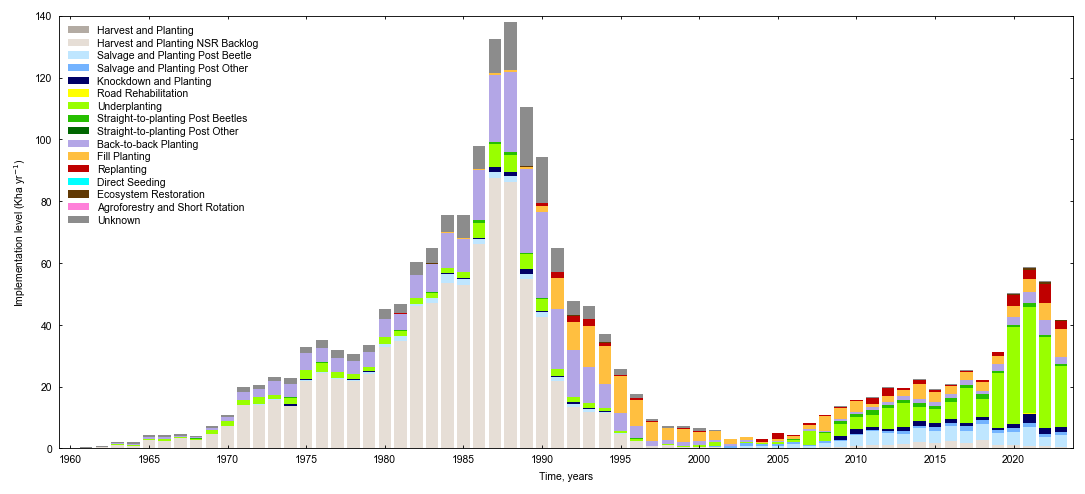

<b>Figure 2</b>. Annual implementation level for non-obligation stand establishment, stratified by artifical stand establishment type (ASET) (Kha/yr).

In [17]:
unose.Plot_AreaTreated_TimeSeriesByASET(metaNO,pNamNO,'NOSE',FigSize=[22,10]); plt.show()
meta=ufcs.FigureCaption(meta,'Annual implementation level for non-obligation stand establishment, stratified by artifical stand establishment type (ASET) (Kha/yr).')

In [18]:
txt=ufcs.AddParagraphs(txt,4)

In [19]:
txt=ufcs.AddParagraphs(txt,2)

In [20]:
txt=ufcs.AddParagraphs(txt,2)

In [21]:
txt=ufcs.AddParagraphs(txt,2)

In [22]:
txt=ufcs.AddParagraphs(txt,2)

In [23]:
txt=ufcs.AddParagraphs(txt,2)

In [24]:
txt=ufcs.AddParagraphs(txt,3)

In [25]:
txt=ufcs.AddParagraphs(txt,2)

In [26]:
txt=ufcs.AddParagraphs(txt,3)

In [27]:
txt=ufcs.AddParagraphs(txt,1)

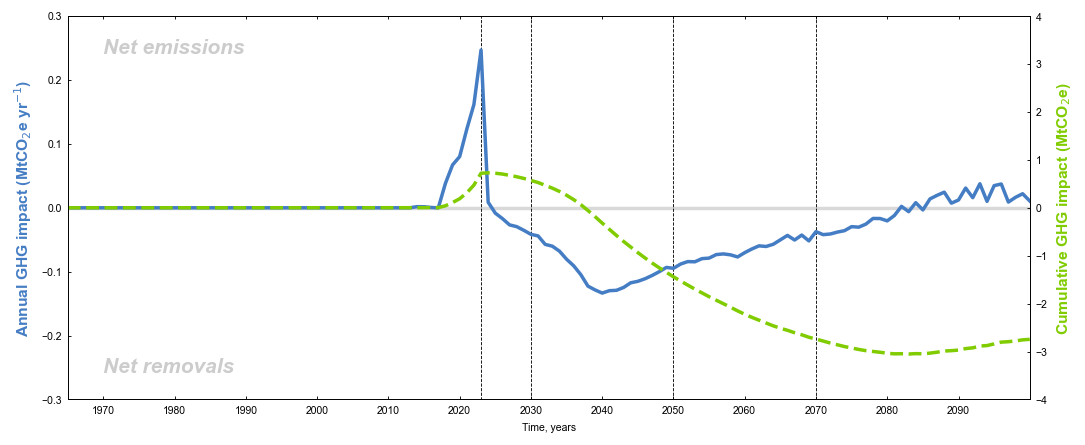

<b>Figure 3</b>. Impact of 2023 operations on annual and cumulative GHG emissions.

In [29]:
unose.Plot_EmissionsAnnAndCumu_TimeSeries_CurrentYear(metaNO,mosNO,pNamNO,cNam); plt.show()
meta=ufcs.FigureCaption(meta,'Impact of 2023 operations on annual and cumulative GHG emissions.')

In [30]:
txt=ufcs.AddParagraphs(txt,2)

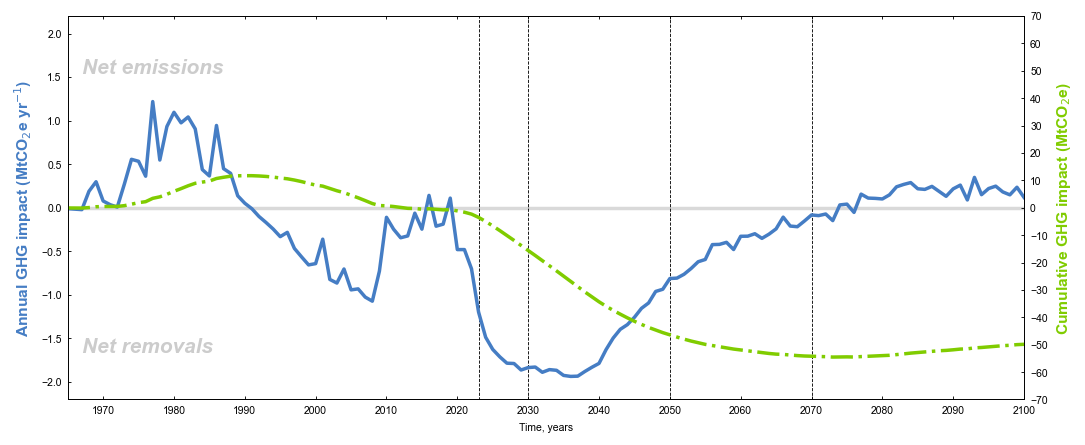

<b>Figure 4</b>. Impact of completed operations on annual and cumulative GHG emissions.

In [31]:
unose.Plot_EmissionsAnnAndCumu_TimeSeries_Completed(metaNO,mosNO,pNamNO,cNam); plt.show()
meta=ufcs.FigureCaption(meta,'Impact of completed operations on annual and cumulative GHG emissions.')

In [32]:
txt=ufcs.AddParagraphs(txt,3)

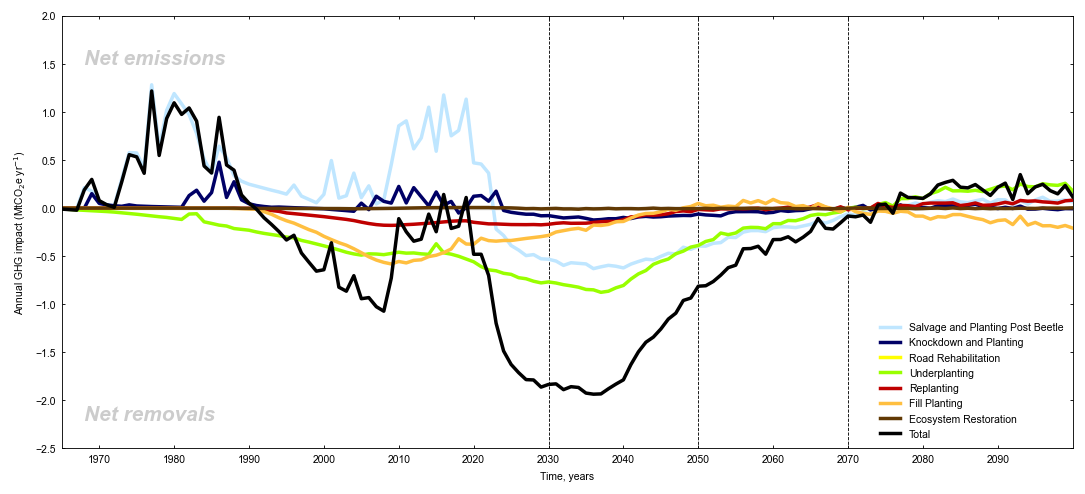

<b>Figure 5</b>. Impact of completed operations on annual GHG emissions, stratified by type of stand establishment.

In [33]:
unose.Plot_EmissionsAnn_TimeSeries_Completed(metaNO,mosNO,pNamNO,cNam); plt.show()
meta=ufcs.FigureCaption(meta,'Impact of completed operations on annual GHG emissions, stratified by type of stand establishment.')

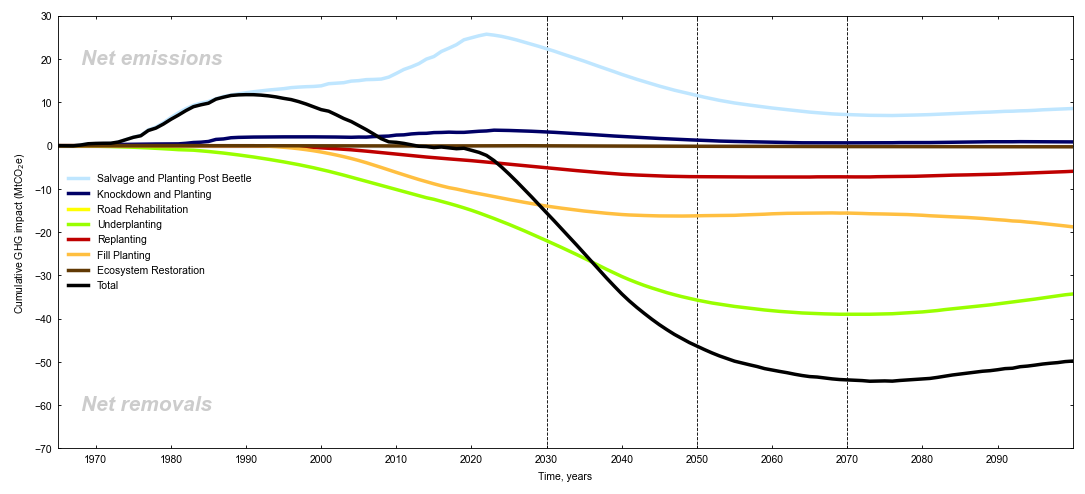

<b>Figure 6</b>. Impact of completed operations on cumulative GHG emissions, stratified by type of stand establishment.

In [34]:
unose.Plot_EmissionsCumu_TimeSeries_Completed(metaNO,mosNO,pNamNO,cNam); plt.show()
meta=ufcs.FigureCaption(meta,'Impact of completed operations on cumulative GHG emissions, stratified by type of stand establishment.')

In [35]:
txt=ufcs.AddParagraphs(txt,1)

In [ ]:
flg=0
if flg==1:
    meta=ufcs.TableCaption(meta,'Total carbon pools averaged over 2021-2030 (MtC) for completed non-obligation stand establishment scenarios.')
    vL=['C_Biomass_Tot','C_DeadWood_Tot','C_Litter_Tot','C_Soil_Tot','C_Forest_Tot','C_HWP_Tot','C_Geological_Tot']
    df=ufcs.ExportTableScenariosAndDelta(metaNOSE,pNamC,mosNOSE,cnam='NOSE1',table_name='Pools',operTime='Mean',operSpace='Sum',t0=2021,t1=2030,iPS=0,iSS=0,iYS=0,units='Actual',multi=1e-6,save='Off',variables=vL)
    df=df.reset_index()
    df=df.rename(columns={'index':'Variable'})
    style=df.style.set_table_styles([
        dict(selector='th',props=[('text-align','right'),('width','170px'),('background-color','#dee9fa'),('font-color','#293e61')]), 
        dict(selector='td',props=[('text-align','right')]), 
        dict(selector='tr:hover',props=[('background-color','#fffbb5')]),
    ])
    style.set_table_styles({'Variable':[{'selector':'','props': [('font-weight','bold'),('text-align','left'),('width','200px')]}]},overwrite=False)  
    style.format(precision=2)
    style.set_properties(**{'text-align':'left'}).hide()
    display(style)

In [36]:
txt=ufcs.AddParagraphs(txt,1)

In [ ]:
flg=0
if flg==1:
    meta=ufcs.TableCaption(meta,'Total carbon pools averaged over 2021-2100 (MtC) for completed non-obligation stand establishment scenarios.')
    vL=['C_Biomass_Tot','C_DeadWood_Tot','C_Litter_Tot','C_Soil_Tot','C_Forest_Tot','C_HWP_Tot','C_Geological_Tot']
    df=ufcs.ExportTableScenariosAndDelta(metaNOSE,pNamC,mosNOSE,cnam='NOSE1',table_name='Pools',operTime='Mean',operSpace='Sum',t0=2021,t1=2100,iPS=0,iSS=0,iYS=0,units='Actual',multi=1e-6,save='Off',variables=vL)
    df=df.reset_index()
    df=df.rename(columns={'index':'Variable'})
    style=df.style.set_table_styles([
        dict(selector='th',props=[('text-align','right'),('width','170px'),('background-color','#dee9fa'),('font-color','#293e61')]), 
        dict(selector='td',props=[('text-align','right')]), 
        dict(selector='tr:hover',props=[('background-color','#fffbb5')]),
    ])
    style.set_table_styles({'Variable':[{'selector':'','props': [('font-weight','bold'),('text-align','left'),('width','200px')]}]},overwrite=False)  
    style.format(precision=2)
    style.set_properties(**{'text-align':'left'}).hide()
    display(style)

In [37]:
txt=ufcs.AddParagraphs(txt,1)

In [38]:
# Plot mean annual emission reductions by decade
#ufcs.NOSE_PlotEmissionsAnn(metaNOSE,mosNOSE,pNamC,cNam); plt.show()
#meta=ufcs.FigureCaption(meta,'Annual GHG emissions (averaged by decade) for completed operations, stratified by artificial stand establishment type.')

In [39]:
txt=ufcs.AddParagraphs(txt,1)

In [40]:
txt=ufcs.AddParagraphs(txt,1)

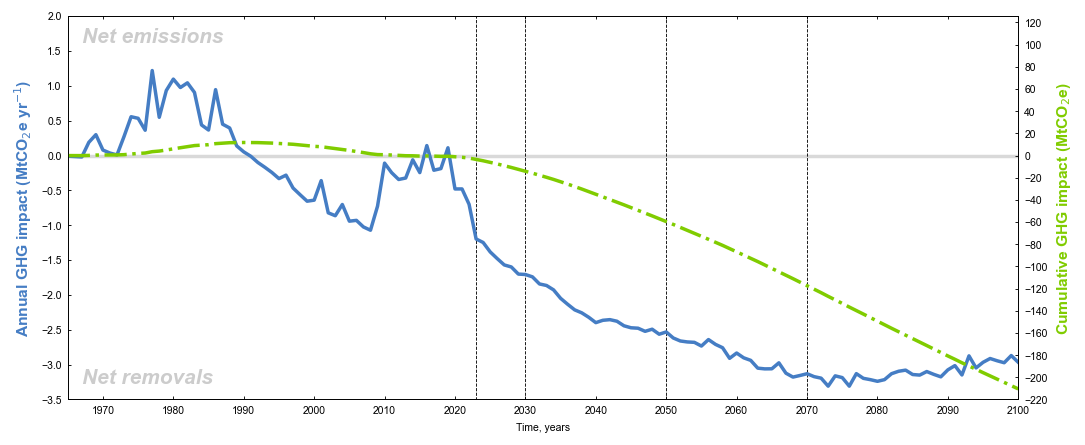

<b>Figure 7</b>. Impact of completed and future operations on annual and cumulative GHG emissions.

In [41]:
unose.Plot_EmissionsAnnAndCumu_TimeSeries_CompletedAndCAP(metaNO,mosNOWF,pNamNO,cNam); plt.show()
meta=ufcs.FigureCaption(meta,'Impact of completed and future operations on annual and cumulative GHG emissions.')

In [42]:
meta=ufcs.TableCaption(meta,'Summary.')
vL=['E_LULUCF','E_Atmosphere_SubstitutionExcluded',
    'E_Atmosphere_SubstitutionIncludedHalf','E_NetBiosphereExchange','E_FossilFuels',
    'V_ToMill_MerchTotal','V_ToMill_NonMerchTotal',
   'Cost Total','Cost Silviculture Total','Revenue Gross','Revenue Net']
df=udem.ExportTableScenariosAndDelta(metaNO,pNamNO,mosNO,
                                     cNam=cNam,
                                     table_name='Pools',
                                     operTime='Sum',
                                     operSpace='Sum',
                                     t0=1961,t1=2030,
                                     iPS=0,iSS=0,iYS=0,
                                     Units='Actual',
                                     Multiplier=1e-6,
                                     Save='Off',
                                     Variables=vL)
df=df.reset_index()
df=df.rename(columns={'index':'Variable'})
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','right'),('width','170px'),('background-color','#dee9fa'),('font-color','#293e61')]), 
    dict(selector='td',props=[('text-align','right')]), 
    dict(selector='tr:hover',props=[('background-color','#fffbb5')]),
])
style.set_table_styles({'Variable':[{'selector':'','props': [('font-weight','bold'),('text-align','left'),('width','200px')]}]},overwrite=False)  
style.format(precision=1)
style.set_properties(**{'text-align':'left'}).hide()
display(style)

<b>Table 1</b>. Summary.

Variable,Baseline,Action,Delta
E_LULUCF,806.9,800.4,-6.5
E_Atmosphere_SubstitutionExcluded,993.4,1043.8,50.4
E_Atmosphere_SubstitutionIncludedHalf,654.0,602.3,-51.7
E_NetBiosphereExchange,864.2,875.7,11.5
E_FossilFuels,-549.6,-714.8,-165.2
V_ToMill_MerchTotal,859.1,1117.3,258.2
V_ToMill_NonMerchTotal,3.3,4.4,1.1
Cost Total,72954.4,98171.9,25217.5
Cost Silviculture Total,679.0,3942.5,3263.4
Revenue Gross,141549.1,182554.8,41005.7


In [ ]:
txt=ufcs.AddParagraphs(txt,1)

In [ ]:
txt=ufcs.AddParagraphs(txt,1)

In [ ]:
txt=ufcs.AddParagraphs(txt,1)

<div class="cite2c-biblio"></div>

In [ ]:
txt=ufcs.AddParagraphs(txt,11)